In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np

In [2]:
Zillow_Ohio_csv = "../Resources/newZillowOH_data.csv"
Ohio_Crime_csv = "../Resources/CrimeData_merged.csv"


In [3]:
zillow_df = pd.read_csv(Zillow_Ohio_csv)
zillow_df = zillow_df.fillna(0)
ohiocrime_df = pd.read_csv(Ohio_Crime_csv)


In [4]:
zillow_df = zillow_df.rename(columns={"RegionName": "City", "2017": "2017 Median Price", "2016":"2016 Median Price",
                                     "2015": "2015 Median Price", "2014": "2014 Median Price", "2013":"2013 Median Price",
                                     "2012":"2012 Median Price"})
zillow_df.columns

Index(['RegionID', 'City', 'StateName', 'SizeRank', '2012 Median Price',
       '2013 Median Price', '2014 Median Price', '2015 Median Price',
       '2016 Median Price', '2017 Median Price'],
      dtype='object')

In [5]:
merge_Zillow_Crime_df = pd.merge(ohiocrime_df, zillow_df, on = "City")
merge_Zillow_Crime_df.to_csv("MergeDataMaria.csv")
merge_Zillow_Crime_df.head()

merge_Zillow_Crime_df=merge_Zillow_Crime_df.sort_values("2017 Population", ascending=False)
merge_ZillowCrime_df = merge_Zillow_Crime_df.drop_duplicates()
merge_ZillowCrime_df
merge_Zillow_Crime_df.to_csv("MergeDataMaria.csv")

In [6]:
merge_Zillow_Crime_df
merge_Zillow_Crime_df["Crime Rate 2017"] = ((merge_Zillow_Crime_df["2017 Violent Crime"])/(merge_Zillow_Crime_df["2017 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2016"] = ((merge_Zillow_Crime_df["2016 Violent Crime"])/(merge_Zillow_Crime_df["2016 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2015"] = ((merge_Zillow_Crime_df["2015 Violent Crime"])/(merge_Zillow_Crime_df["2015 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2014"] = ((merge_Zillow_Crime_df["2014 Violent Crime"])/(merge_Zillow_Crime_df["2014 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2013"] = ((merge_Zillow_Crime_df["2013 Violent Crime"])/(merge_Zillow_Crime_df["2013 Population"]))*100000

merge_Zillow_Crime_df.reset_index().tail()


,index,Unnamed: 0,Unnamed: 0_x,County_x,City,2017 Population,2017 Violent Crime,2017 Murder,2017 Rape,2017 Robbery,...,2013 Median Price,2014 Median Price,2015 Median Price,2016 Median Price,2017 Median Price,Crime Rate 2017,Crime Rate 2016,Crime Rate 2015,Crime Rate 2014,Crime Rate 2013
125,107,276,530,Summit County,Tallmadge,287,0,0,0,0,...,1084600,1753500,1697000,1735400,1868000,0.0,133.619938,98.665119,133.302423,NaN
126,54,183,359,Franklin County,New Albany,168,0,0,0,0,...,4896800,4655800,5024200,5159200,5888300,0.0,48.971596,52.460392,33.141847,22.875443
127,44,116,199,Fairfield County,Pickerington,76,0,0,0,0,...,2065800,2292400,2283300,2466800,2685000,0.0,80.144260,NaN,NaN,NaN
128,84,321,605,Mahoning County,Youngstown,11,0,0,0,0,...,0,0,164200,261300,308200,0.0,646.719651,739.972445,660.397785,813.221002
129,57,144,251,Dayton,Centerville,2,0,0,0,0,...,1842400,1873600,1770600,1963900,1979400,0.0,54.505052,58.611739,96.045434,NaN


In [7]:
Crime_PropertyValue_2017df = merge_Zillow_Crime_df[["City","2017 Median Price", "Crime Rate 2017", "2017 Population"]]
Crime_PropertyValue_2017df.head()


,City,2017 Median Price,Crime Rate 2017,2017 Population
32,Columbus,1749600,513.109545,853424
13,Cleveland,625500,1556.762536,385351
61,Cincinnati,1436800,947.124193,299116
79,Toledo,861900,1020.872126,277116
115,Akron,692400,697.525986,197412


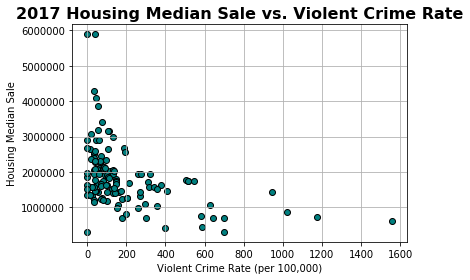

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(Crime_PropertyValue_2017df["Crime Rate 2017"], Crime_PropertyValue_2017df["2017 Median Price"], color="teal", marker="o", edgecolor="black")

plt.title("2017 Housing Median Sale vs. Violent Crime Rate", fontsize=16, fontweight="bold")
plt.ylabel("Housing Median Sale")
plt.xlabel("Violent Crime Rate (per 100,000)")
plt.grid(True)
plt.show()
plt.savefig("Plots/2017 Housing Median Sale vs. Violent Crime Rate.png")


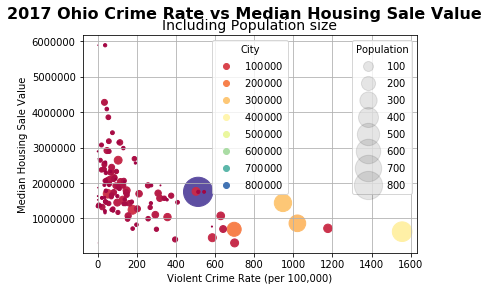

<Figure size 432x288 with 0 Axes>

In [9]:
#Creating plots with visualization on population size
crime_rate= Crime_PropertyValue_2017df["Crime Rate 2017"]
median_housing = Crime_PropertyValue_2017df["2017 Median Price"]
population = Crime_PropertyValue_2017df["2017 Population"]
city = Crime_PropertyValue_2017df["City"]
fig, ax = plt.subplots()
fig.suptitle("2017 Ohio Crime Rate vs Median Housing Sale Value", fontsize=16, fontweight="bold")
plt.title("Including Population size", fontsize = 14)

scatter = ax.scatter(crime_rate, median_housing, c=population, s=population/1000, cmap="Spectral")
                
legend1 = ax.legend(*scatter.legend_elements(),
                     loc="upper center", title="City")
ax.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.1)
legend2 = ax.legend(handles, labels, loc="upper right", title="Population")

plt.ylabel("Median Housing Sale Value")
plt.xlabel("Violent Crime Rate (per 100,000)")
plt.grid(True)
plt.show()
plt.savefig("Plots/2017 Ohio Crime Rate vs Median Housing w Pop size Sale.png")

C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\collections.py:995: RuntimeWarning: invalid value encountered in greater_equal
  cond = ((label_values >= func(arr).min()) &
C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in less_equal
  (label_values <= func(arr).max()))


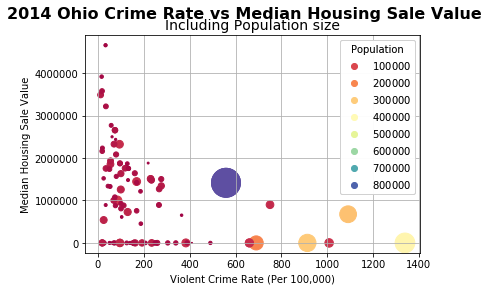

<Figure size 432x288 with 0 Axes>

In [10]:
Crime_PropertyValue_2014df = merge_Zillow_Crime_df[["City","2014 Median Price", "Crime Rate 2014", "2014 Population"]]
Crime_PropertyValue_2014df.head()

crime_rate= Crime_PropertyValue_2014df["Crime Rate 2014"]
median_housing = Crime_PropertyValue_2014df["2014 Median Price"]
population = Crime_PropertyValue_2014df["2014 Population"]
city = Crime_PropertyValue_2014df["City"]
fig, ax = plt.subplots()
fig.suptitle("2014 Ohio Crime Rate vs Median Housing Sale Value ", fontsize=16, fontweight="bold")
plt.title("Including Population size", fontsize = 14)
scatter = ax.scatter(crime_rate, median_housing, c=population, s=population/1000, cmap="Spectral")
                
legend1 = ax.legend(*scatter.legend_elements(),
                     loc="best", title="Population")
ax.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.1)

plt.ylabel("Median Housing Sale Value")
plt.xlabel("Violent Crime Rate (Per 100,000)")
plt.grid(True)
plt.show()
plt.savefig("Plots/2014 Ohio Crime Rate vs. Median Housing Sale(inc Pop. size).png")

5.301249871201501e-07


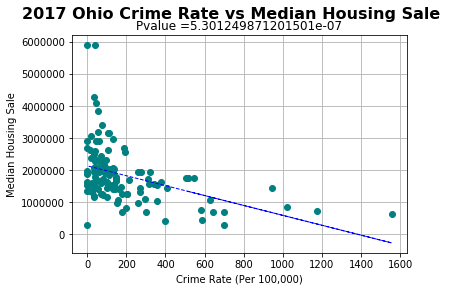

In [11]:
Data1=pd.to_numeric(Crime_PropertyValue_2017df["Crime Rate 2017"])
Data2=pd.to_numeric(Crime_PropertyValue_2017df["2017 Median Price"])
# Set line
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Data1 , Data2)
fit = vc_slope * Data1 + vc_int
# Plot data
fig, ax = plt.subplots()
fig.suptitle("2017 Ohio Crime Rate vs Median Housing Sale ", fontsize=16, fontweight="bold")
#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)
plt.grid()
ax.set_xlabel("Crime Rate (Per 100,000)")
ax.plot(Data1, Data2, linewidth=0, marker='o',color="teal")
ax.plot(Data1, fit, "b--", linewidth=1)
ax.set_ylabel("Median Housing Sale")
print(vc_p)
plt.title("Pvalue ="+str(5.301249871201501e-07))
plt.show()


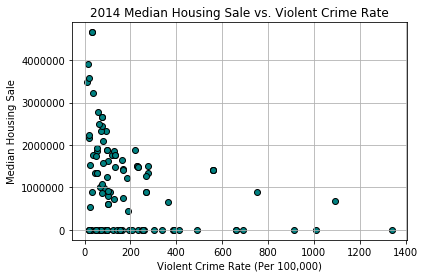

,City,2014 Median Price,Crime Rate 2014
32,Columbus,1416700,558.490439
13,Cleveland,0,1339.234025
61,Cincinnati,0,913.424553
79,Toledo,675400,1091.232438
115,Akron,0,690.278992


In [12]:
Crime_PropertyValue_2015df = merge_Zillow_Crime_df[["City","2014 Median Price", "Crime Rate 2014"]]
Crime_PropertyValue_2015df.head()
plt.scatter(Crime_PropertyValue_2015df["Crime Rate 2014"], Crime_PropertyValue_2015df["2014 Median Price"], color = "teal", marker="o", edgecolor="black")

plt.title("2014 Median Housing Sale vs. Violent Crime Rate")
plt.ylabel("Median Housing Sale")
plt.xlabel("Violent Crime Rate (Per 100,000)")
plt.grid(True)
plt.show()
Crime_PropertyValue_2015df.head()

In [13]:
#Ohio Avg. Crime Rate
CrimeRate_df = merge_Zillow_Crime_df[["2017 Population","City","Crime Rate 2013", "Crime Rate 2014",
                                      "Crime Rate 2015", "Crime Rate 2016","Crime Rate 2017", 
                                     "2014 Median Price", "2015 Median Price", "2016 Median Price", "2017 Median Price"]]
CrimeRate_df = CrimeRate_df.rename(columns={"Crime Rate 2016": "2016", "Crime Rate 2015": "2015",
                                            "Crime Rate 2014": "2014",  "Crime Rate 2013": "2013",
                                           "Crime Rate 2017": "2017"})

CrimeRate_df =CrimeRate_df.fillna(0)
#CrimeRate_df= CrimeRate_df.set_index("City")
AverageOH_Crime = CrimeRate_df.mean()
AverageOH_Crime

2017 Population      3.662525e+04
2013                 1.249249e+02
2014                 1.664220e+02
2015                 1.690466e+02
2016                 1.670067e+02
2017                 1.817112e+02
2014 Median Price    1.022916e+06
2015 Median Price    1.175305e+06
2016 Median Price    1.503129e+06
2017 Median Price    1.854338e+06
dtype: float64

In [14]:
#Created bins by population size for cities in Ohio
size_bins = [0, 100000, 200000, 300000, 40000,880000]
bins = ["Pop. 100000 and less", "Pop. 100001 - 200000", "Pop. 200001 - 300000","Pop. 300001 - 400000","Pop. 400000 and over"]
pd.cut(CrimeRate_df["2017 Population"], [0, 100000, 200000, 300000,400000,880000], labels=bins)
CrimeRate_df["City Size"] = pd.cut(CrimeRate_df["2017 Population"],[0, 100000, 200000, 300000,400000, 880000],labels=bins)
CrimeRate_dfGrouped = CrimeRate_df.groupby("City Size")
CrimeRate_dfGrouped.mean()
crimerate_bycitysize = pd.DataFrame(CrimeRate_dfGrouped[ "2014", "2015", "2016", "2017"].mean())
crimerate_bycitysize
#Scores_by_sizeGrouped = Scores_by_size.groupby("School Size")
crimerate_bycitysize.to_csv("CrimeRate_byCitySize.csv")
crimerate_bycitysize

,2014,2015,2016,2017
City Size,,,,
Pop. 100000 and less,136.337579,140.561861,134.715202,151.096467
Pop. 100001 - 200000,690.278992,619.980059,616.454676,697.525986
Pop. 200001 - 300000,1002.328495,1031.510684,1051.189697,983.998159
Pop. 300001 - 400000,1339.234025,1161.576713,1630.906177,1556.762536
Pop. 400000 and over,558.490439,561.253679,521.730057,513.109545


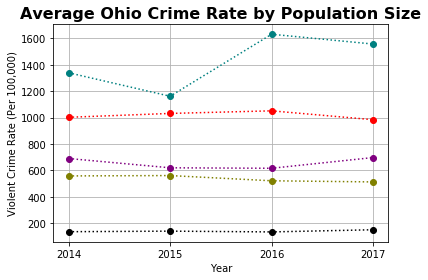

In [15]:
years = crimerate_bycitysize.keys()
population1, = plt.plot(years, crimerate_bycitysize.loc["Pop. 400000 and over",["2014","2015","2016","2017"]], 
                                                        color = "olive", linestyle =":", label = "Columbus", marker = 'o')
population2, = plt.plot(years, crimerate_bycitysize.loc["Pop. 300001 - 400000",["2014","2015","2016","2017"]], 
                                                        color = "teal", linestyle =":", label = "Cleveland", marker = 'o')
population3, = plt.plot(years, crimerate_bycitysize.loc["Pop. 200001 - 300000",["2014","2015","2016","2017"]], 
                                                        color = "red", linestyle =":", label = "Pop. 201-300K)", marker = 'o')
population4 = plt.plot(years, crimerate_bycitysize.loc["Pop. 100001 - 200000",["2014","2015","2016","2017"]], 
                                                        color = "purple", linestyle =":", label = "Akron", marker = 'o')
population4 = plt.plot(years, crimerate_bycitysize.loc["Pop. 100000 and less",["2014","2015","2016","2017"]], 
                                                        color = "black", linestyle =":", label = "Pop. 100K and Less", marker = 'o')

plt.grid()
plt.title("Average Ohio Crime Rate by Population Size", fontsize=16, fontweight='bold')
plt.ylabel("Violent Crime Rate (Per 100,000)")
plt.xlabel("Year")
#plt.legend(loc='best')
plt.savefig("Plots/Avg Ohio Crime Rate by Population size.png")

In [16]:
size_bins = [0, 100000, 200000, 300000, 40000,880000]
bins = ["Pop. 100000 and less", "Pop. 100001 - 200000", "Pop. 200001 - 300000","Pop. 300001 - 400000","Pop. 400000 and over"]
pd.cut(CrimeRate_df["2017 Population"], [0, 100000, 200000, 300000,400000,880000], labels=bins)
CrimeRate_df["City Size"] = pd.cut(CrimeRate_df["2017 Population"],[0, 100000, 200000, 300000,400000, 880000],labels=bins)
CrimeRate_dfGrouped = CrimeRate_df.groupby("City Size")
CrimeRate_dfGrouped.mean()
Housingprice_bycitysize = pd.DataFrame(CrimeRate_dfGrouped["2014 Median Price", "2015 Median Price",
                                                              "2016 Median Price","2017 Median Price" ].mean())
Housingprice_bycitysize=Housingprice_bycitysize.rename(columns={"2014 Median Price":"2014","2015 Median Price":"2015",
                                                                "2016 Median Price":"2016","2017 Median Price":"2017"})

Housingprice_bycitysize
# Housingprice_bycitysize.to_csv("HousingpricebyCitySize.csv")


,2014,2015,2016,2017
City Size,,,,
Pop. 100000 and less,1047096.0,1200496.8,1535408.8,1885581.6
Pop. 100001 - 200000,0.0,136400.0,577700.0,692400.0
Pop. 200001 - 300000,337700.0,385800.0,404400.0,1149350.0
Pop. 300001 - 400000,0.0,294300.0,486200.0,625500.0
Pop. 400000 and over,1416700.0,1525200.0,1608000.0,1749600.0


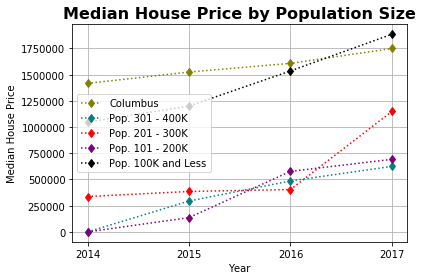

In [17]:
years = Housingprice_bycitysize.keys()
HousePrice1, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 400000 and over",["2014","2015","2016","2017"]], 
                                                        color = "olive", linestyle =":", label = "Columbus", marker = 'd')
HousePrice2, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 300001 - 400000",["2014","2015","2016","2017"]], 
                                                        color = "teal", linestyle =":", label = "Pop. 301 - 400K", marker = 'd')
HousePrice3, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 200001 - 300000",["2014","2015","2016","2017"]], 
                                                        color = "red", linestyle =":", label = "Pop. 201 - 300K", marker = 'd')
HousePrice4 = plt.plot(years, Housingprice_bycitysize.loc["Pop. 100001 - 200000",["2014","2015","2016","2017"]], 
                                                        color = "purple", linestyle =":", label = "Pop. 101 - 200K", marker = 'd')
HousePrice5 = plt.plot(years, Housingprice_bycitysize.loc["Pop. 100000 and less",["2014","2015","2016","2017"]], 
                                                        color = "black", linestyle =":", label = "Pop. 100K and Less", marker = 'd')
plt.grid()
plt.title("Median House Price by Population Size", fontsize=16, fontweight='bold')
plt.ylabel("Median House Price")
plt.xlabel("Year")
plt.legend(loc='best')
plt.savefig("Plots/Avg Median Price by Population size.png")

In [18]:
size_bins = [0, 20000, 50000, 80000,190000, 870000]
bins = ["Pop. 20K and less", "Pop. 21K - 50K", "Pop. 51K - 80K","Pop. 81K - 190K","Pop. 191K and over"]
pd.cut(CrimeRate_df["2017 Population"], [0, 20000, 50000, 80000,190000, 870000], labels=bins)
CrimeRate_df["City Size"] = pd.cut(CrimeRate_df["2017 Population"],[0, 20000, 50000, 80000,190000, 870000],labels=bins)
CrimeRate_dfGrouped = CrimeRate_df.groupby("City Size")
CrimeRate_dfGrouped.mean()
crimerate_bycitysizeupdate = pd.DataFrame(CrimeRate_dfGrouped[ "2014", "2015", "2016", "2017"].mean())
crimerate_bycitysizeupdate

Housingprice_bycitysize = pd.DataFrame(CrimeRate_dfGrouped["2014 Median Price", "2015 Median Price",
                                                              "2016 Median Price","2017 Median Price" ].mean())
Housingprice_bycitysize=Housingprice_bycitysize.rename(columns={"2014 Median Price":"2014","2015 Median Price":"2015",
                                                                "2016 Median Price":"2016","2017 Median Price":"2017"})

#Scores_by_sizeGrouped = Scores_by_size.groupby("School Size")
crimerate_bycitysize.to_csv("CrimeRate_byCitySizeupdate.csv")
crimerate_bycitysizeupdate=crimerate_bycitysizeupdate.dropna()



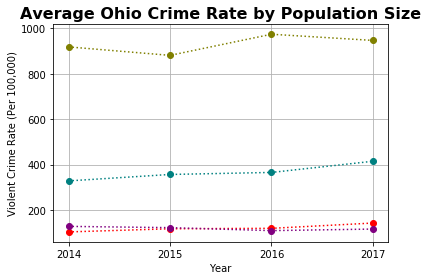

In [19]:
years = crimerate_bycitysize.keys()
population1, = plt.plot(years, crimerate_bycitysizeupdate.loc["Pop. 191K and over",["2014","2015","2016","2017"]], 
                                                        color = "olive", linestyle =":", label = "Cities Pop. 191K +", marker = 'o')
population2, = plt.plot(years, crimerate_bycitysizeupdate.loc["Pop. 51K - 80K",["2014","2015","2016","2017"]], 
                                                        color = "teal", linestyle =":", label = "Cleveland", marker = 'o')
population3, = plt.plot(years, crimerate_bycitysizeupdate.loc["Pop. 21K - 50K",["2014","2015","2016","2017"]], 
                                                        color = "red", linestyle =":", label = "Pop. 201-300K)", marker = 'o')
population4 = plt.plot(years, crimerate_bycitysizeupdate.loc["Pop. 20K and less",["2014","2015","2016","2017"]], 
                                                        color = "purple", linestyle =":", label = "Pop. 20K and less", marker = 'o')


plt.grid()
plt.title("Average Ohio Crime Rate by Population Size", fontsize=16, fontweight='bold')
plt.ylabel("Violent Crime Rate (Per 100,000)")
plt.xlabel("Year")
#plt.legend(loc='best')
plt.savefig("Plots/Avg Ohio Crime Rate by Population size.png")

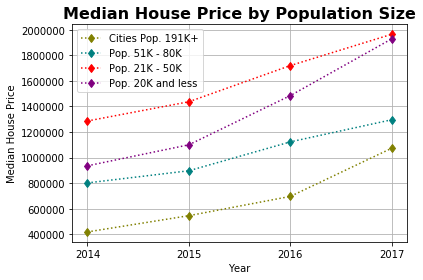

In [20]:
years = Housingprice_bycitysize.keys()
HousePrice1, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 191K and over",["2014","2015","2016","2017"]], 
                                                        color = "olive", linestyle =":", label = "Cities Pop. 191K+", marker = 'd')
HousePrice2, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 51K - 80K",["2014","2015","2016","2017"]], 
                                                        color = "teal", linestyle =":", label = "Pop. 51K - 80K", marker = 'd')
HousePrice3, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 21K - 50K",["2014","2015","2016","2017"]], 
                                                        color = "red", linestyle =":", label = "Pop. 21K - 50K", marker = 'd')
HousePrice4 = plt.plot(years, Housingprice_bycitysize.loc["Pop. 20K and less",["2014","2015","2016","2017"]], 
                                                        color = "purple", linestyle =":", label = "Pop. 20K and less", marker = 'd')

plt.grid()
plt.title("Median House Price by Population Size", fontsize=16, fontweight='bold')
plt.ylabel("Median House Price")
plt.xlabel("Year")
plt.legend(loc='best')